# 데이터 Save, Read 함수

pickle 라이브러리 사용

save_data(저장할 데이터, 저장할 파일명.확장자)

read_data(읽을 파일명.확장자)

In [1]:
import pickle

# 데이터 쓰기
def save_data(data, file_name):
    file = open(f'{file_name}', 'wb')
    pickle.dump(data, file)
    print(f'Save \'{file_name}\' Complete')

# 데이터 읽기
def read_data(file_name):
    file = open(f'{file_name}', 'rb')
    data = pickle.load(file)
    print(f'Read \'{file_name}\' Complete')
    
    return data

# 데이터 정규화 및 라벨링


### 정규 표현식(string 문장)
    온점, 쉼표, 괄호 등 특수문자 제거
    
### 문장 토큰화(string 문장)
    조사(을, 를, 이, 가 등) 제거
    접미사(씨, 님, 들 등) 제거
    
### 라벨링(폴더번호, 사용자가 지정한 번호)
    폴더번호가 사용자가 지정한 번호와 일치하면 라벨 1
    폴더번호가 사용자가 지정한 번호와 불일치하면 라벨 0

In [2]:
def regular_expression(text):
    text = text.replace('.', '')  # 정규 표현식을 위해 '온점'을 제거하는 작업
    text = text.replace(',', '')  # 정규 표현식을 위해 '쉼표'를 제거하는 작업
    text = text.replace('(', '')  # 정규 표현식을 위해 '('를 제거하는 작업
    text = text.replace(')', '')  # 정규 표현식을 위해 ')'를 제거하는 작업
    text = text.replace('[', '')  # 정규 표현식을 위해 '['를 제거하는 작업
    text = text.replace(']', '')  # 정규 표현식을 위해 ']'를 제거하는 작업
    text = text.replace('\'', '')  # 정규 표현식을 위해 '작은 따옴표'를 제거하는 작업
    text = text.replace('\"', '')  # 정규 표현식을 위해 '큰 따옴표'를 제거하는 작업
    text = text.replace('\n', '')  # 정규 표현식을 위해 '\n'를 제거하는 작업

    return text

In [3]:
from konlpy.tag import Okt
okt = Okt()

# 문장의 토큰화
def tokenizer(text):
    text = regular_expression(text)                           # 정규 표현식, 특수문자 제거
    tokens = okt.pos(text, norm=True, stem=True, join=True) # norm=정규화, stem=어간추출, join=형태소/품사형태
    for token in tokens:
        if 'Josa' in token or 'Suffix' in token:             # 조사(을, 를, 이, 가), 접미사(들) 제외
            tokens.remove(token)
        
    return tokens

def labeling(Category, label_num):
    if Category == label_num:
        return 1
    return 0

def tokenizing_and_labeling(path, category_num, label_num):
    data = []
    text = open(path, 'r', encoding='UTF-8').read()
    tokens = tokenizer(text)
    label = labeling(category_num, label_num)
    data.append(text)
    data.append(tokens)
    data.append(label)

    return data

In [4]:
print(f'\n==============================================================================================================================')
print(f'======================================================= tokenizer 테스트 =====================================================\n')

dataset = []
data = []

text = '그러나 다이어리를 구입하여 항상 일정을 기록하고 우선순위 중심으로 매일 세부계획을 세우면서 모든 일을 제시간에 처리하려고 노력하여 단점을 보완하려고 하고 있습니다.'
tokens = tokenizer(text)

data.append(tokens)
data.append(0)
dataset.append(data)

print(dataset[0])


======================================================= tokenizer 테스트 =====================================================

[['그러나/Conjunction', '다이어리/Noun', '구입/Noun', '하다/Verb', '항상/Noun', '일정/Noun', '기록/Noun', '우선/Noun', '순위/Noun', '중심/Noun', '매일/Noun', '세부/Noun', '계획/Noun', '세우다/Verb', '모든/Noun', '일/Noun', '제/Modifier', '시간/Noun', '처리/Noun', '하다/Verb', '노력/Noun', '하다/Verb', '단점/Noun', '보완/Noun', '하다/Verb', '하다/Verb', '있다/Adjective'], 0]


# 데이터 생성 및 불러오기

# 상위빈도 10개 단어 출력하기

In [5]:
# 최적화 시도중
import os, shutil
import random

def create_dataset(path, label_num):
    train_dataset = []
    valid_dataset = []
    test_dataset = []

    for i, folder in enumerate(os.listdir(path)):     # 각각의 Category[] 폴더에 대하여
        file_list = os.listdir(f'{path}/{folder}')

        for _ in range(10):
            file = random.choice(file_list)
            file_list.remove(file)
            data = tokenizing_and_labeling(f'{path}/{folder}/{file}', i, label_num)
            valid_dataset.append(data)

            file = random.choice(file_list)
            file_list.remove(file)
            data = tokenizing_and_labeling(f'{path}/{folder}/{file}', i, label_num)
            test_dataset.append(data)

        for file in file_list:
            data = tokenizing_and_labeling(f'{path}/{folder}/{file}', i, label_num)
            train_dataset.append(data)
            
    save_data(train_dataset, f'train_data.pickle')
    save_data(valid_dataset, f'valid_data.pickle')
    save_data(test_dataset, f'test_data.pickle')

    return train_dataset, valid_dataset, test_dataset

In [6]:
import nltk
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc

def frequencing(dataset):
    tokens = []
    for data in dataset:
        tokens.extend(data[1])
    frequency = nltk.Text(tokens)
    return frequency
    
def top_words_graph(frequency, top_num):
    # 한글 출력을 위한 폰트설정
    font_fname = 'c:/windows/fonts/gulim.ttc'
    font_name = font_manager.FontProperties(fname=font_fname).get_name()
    rc('font', family=font_name)

    # 결과 그래프 출력
    print(f'단어종류: {len(frequency.vocab().keys())}')
    print(f'상위빈도:\n{frequency.vocab().most_common(top_num)}')
    plt.figure(figsize=(20,10))
    frequency.plot(50)

In [7]:
# 랜덤으로 새로운 훈련, 검증, 테스트 데이터 생성하기
path = f'../07_Saramin_dataset/Clustered/answer'
train_data, valid_data, test_data = create_dataset(path, 0)

Save 'train_data.pickle' Complete
Save 'valid_data.pickle' Complete
Save 'test_data.pickle' Complete


In [8]:
# 데이터 불러오기
train_data = read_data('train_data.pickle')
valid_data = read_data('valid_data.pickle')
test_data = read_data('test_data.pickle')

Read 'train_data.pickle' Complete
Read 'valid_data.pickle' Complete
Read 'test_data.pickle' Complete


('Train_data[0]:\n'
 "['[꼼꼼함과 완벽함 사이]\\n차분하고 꼼꼼한 성격을 지닌 저는 항상 주어진 일에 최선을 다하며 주위 사람들로부터 책임감이 강하다는 "
 '말을 많이 듣습니다. 한 번 시작한 일은 끝을 맺어야 한다는 생각으로 어떤 일이든 마무리를 짓습니다. 이런 강점은 제가 가지고 있는 '
 '인내와 끈기가 바탕이 됩니다. 특히, 제가 흥미를 가지고 좋아하는 일에는 열정적으로 달려들어 파고드는 성격입니다.\\n한편 지나친 '
 '꼼꼼함은 단점으로 비치기도 합니다. 과제나 한 가지 일이 주어지면 완벽을 추구하기 때문에 일정이 촉박해 며칠 밤을 지새기도 했습니다. '
 '사람들 사이에서 지나친 완벽주의자라는 평이 있을 만큼, 한 가지 일에 매달리다 보면 다른 일에 소홀해지고는 합니다. 그러나 다이어리를 '
 '구입하여 항상 일정을 기록하고 우선순위 중심으로 매일 세부계획을 세우면서 모든 일을 제시간에 처리하려고 노력하여 단점을 보완하려고 하고 '
 "있습니다. \\n', ['꼼꼼하다/Adjective', '완벽하다/Adjective', '사이/Noun', "
 "'차분하다/Adjective', '꼼꼼하다/Adjective', '성격/Noun', '지니다/Verb', '저/Noun', "
 "'항상/Noun', '주어지다/Verb', '일/Noun', '최선/Noun', '다/Adverb', '하다/Verb', "
 "'주위/Noun', '사람/Noun', '로부터/Noun', '책임감/Noun', '강하다/Adjective', '말/Noun', "
 "'많이/Adverb', '듣다/Verb', '하다/Verb', '번/Noun', '시작/Noun', '일/Noun', '끝/Noun', "
 "'맺다/Verb', '한다는/Modifier', '생각/Noun', '어떻다/Adjective', '일이/Noun', "
 "'마무리/Noun', '짓다/Verb', '이렇다/Adjective', '강점/Noun', '제/Noun', '가지/Noun'

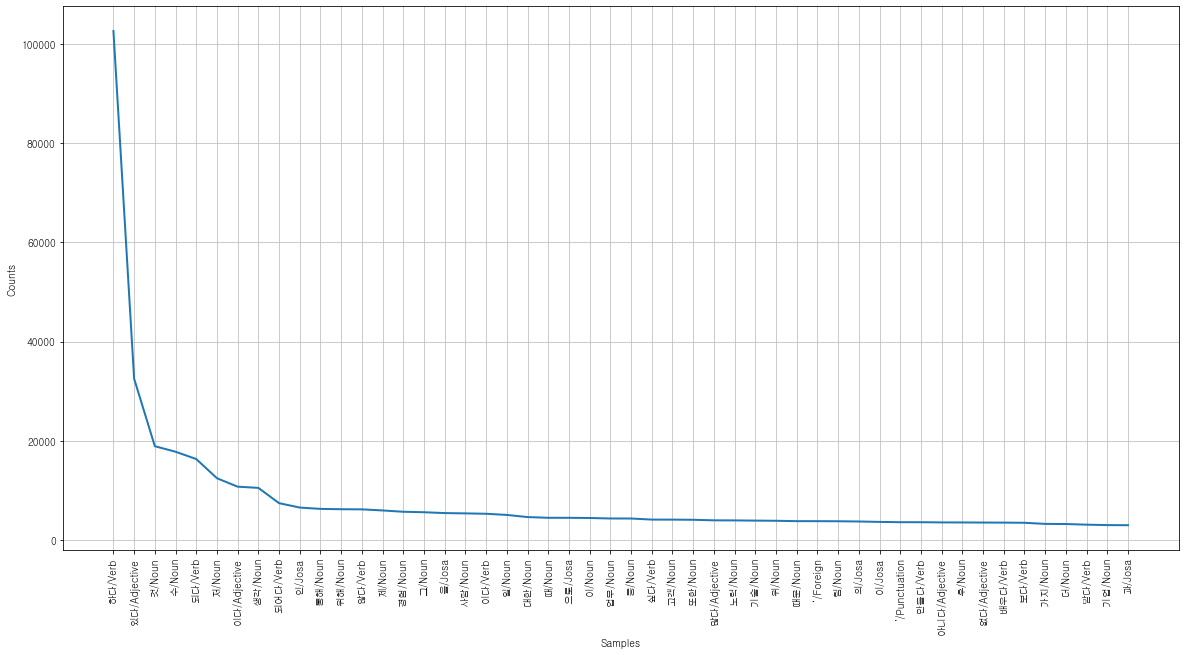

In [9]:
from pprint import pprint
pprint(f'Train_data[0]:\n{train_data[0]}')

# 불러온 데이터의 상위 10개 빈도 단어 출력
frequency = frequencing(train_data)
top_words_graph(frequency, 10)

# 데이터 전처리

In [10]:
# 상위빈도 10000개의 단어를 각 자소서의 평가지표로 삼는다.
# 각 자소서에 상위빈도 10000개의 단어의 출현빈도 만들기
def data_preprocess(tokens, frequency, top_num=10000):
    result = []
    for token in frequency.vocab().most_common(top_num):    # 전체 토큰 상위빈도 단어 10000종류
        result.append(tokens.count(token[0]))                # 한 데이터에 상위빈도 단어가 각각 몇 번 출현했는지
                    
    return result

In [11]:
# 각 자소서에 상위빈도 10000개의 단어의 출현빈도 만들기
# [[10000개], [10000개], [10000개] ...] 형태
x_train = [data_preprocess(tokens, frequency) for _, tokens, _ in train_data]
x_valid = [data_preprocess(tokens, frequency) for _, tokens, _ in valid_data]
x_test = [data_preprocess(tokens, frequency) for _, tokens, _ in test_data]

# 각 자소서의 라벨만 추출하여 리스트 형태로 변환
y_train = [label for _, _, label in train_data]
y_valid = [label for _, _, label in valid_data]
y_test = [label for _, _, label in test_data]

# 각 자소서의 원본텍스트만 추출하여 리스트 형태로 변환
z_train = [text for text, _, _ in train_data]
z_valid = [text for text, _, _ in valid_data]
z_test = [text for text, _, _ in test_data]

In [12]:
#모델링을 하기 위해 리스트로 되어 있는 데이터 형식을 array로 바꿔주고 dtype도 실수로 바꿔준다.
import numpy as np

x_train = np.asarray(x_train).astype('float32')
x_valid = np.asarray(x_valid).astype('float32')
x_test = np.asarray(x_test).astype('float32')

y_train = np.asarray(y_train).astype('float32')
y_valid = np.asarray(y_valid).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [13]:
print(f'Len Train_X: {len(x_train)}')
print(f'Len Train_Y: {len(y_train)}')
print(f'Len Train_X[0]: {len(x_train[0])}')
print(f'Train_Y[0]: {y_train[0]}\n')

print(f'Len Valid_X: {len(x_valid)}')
print(f'Len Valid_Y: {len(y_valid)}')
print(f'Len Valid_X[0]: {len(x_valid[0])}')
print(f'Valid_Y[0]: {y_valid[0]}\n')

print(f'Len Test_X: {len(x_test)}')
print(f'Len Test_Y: {len(y_test)}')
print(f'Len Test_X[0]: {len(x_test[0])}')
print(f'Test_Y[0]: {y_test[0]}\n')

Len Train_X: 6166
Len Train_Y: 6166
Len Train_X[0]: 10000
Train_Y[0]: 1.0

Len Valid_X: 240
Len Valid_Y: 240
Len Valid_X[0]: 10000
Valid_Y[0]: 1.0

Len Test_X: 240
Len Test_Y: 240
Len Test_X[0]: 10000
Test_Y[0]: 1.0



# 모델 생성 및 학습

In [14]:
from keras import models
from keras import layers
from keras import regularizers
from keras.optimizers import RMSprop, SGD, Adam

# keras를 활용하여 모델의 층 입력하기
# 상위빈도 10000개를 추출했으므로 input_shape = 10000
model = models.Sequential() 
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))

#model.add(layers.Dense(64, kernel_regularizer = regularizers.l2(0.001), activation = 'relu', input_shape = (10000,)))
#model.add(layers.Dense(64, kernel_regularizer = regularizers.l2(0.001), activation = 'relu'))
#model.add(layers.Dense(64, kernel_regularizer = regularizers.l2(0.001), activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

'''
############################################################################################################
# RMSProp 모델 생성
model.compile(optimizer = RMSprop(lr=0.001),
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

# Adam 모델 생성
model.compile(optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999),
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
############################################################################################################
'''
model.compile(optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999),
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

# 모델 학습
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_valid, y_valid))

# 결과 예측
results = model.evaluate(x_test, y_test)
results

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 6166 samples, validate on 240 samples
Epoch 1/20
6166/6166 [==============================] - 1s 117us/step - loss: 0.4162 - accuracy: 0.8699 - val_loss: 0.1704 - val_accuracy: 0.9583
Epoch 2/20
6166/6166 [==============================] - 0s 52us/step - loss: 0.2630 - accuracy: 0.9184 - val_loss: 0.1755 - val_accuracy: 0.9583
Epoch 3/20
6166/6166 [==============================] - 0s 52us/step - loss: 0.1967 - accuracy: 0.9184 - val_loss: 0.1504 - val_accuracy: 0.9583
Epoch 4/20
6166/6166 [==============================] - 0s 52us/step - loss: 0.1479 - accuracy: 0.9184 - val_loss: 0.1566 - val_accuracy: 0.9583
Epoch 5/20
6166/6166 [==============================] - 0s 52us/step - loss: 0.1065 - accuracy: 0.9199 - val_loss: 0.1663 - val_accuracy: 0.9583
Epoch 6/20
6166/6166 [=============================

[0.392717852795613, 0.9666666388511658]

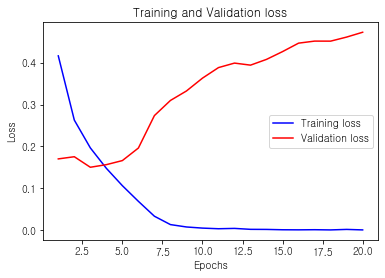

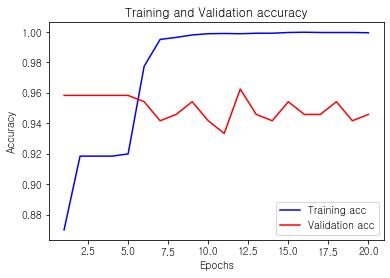

In [15]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'b', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 테스트 데이터 일치도 예측

In [16]:
# 테스트 데이터 예측, 카테고리별로 10개씩 추출되어있음
for i, accuracy in enumerate(model.predict(x_test)):
    if i % 10 == 0:
        print(f'======================================================================================================')
        print(f'카테고리 {int(i / 10)}')
        
    score = float(accuracy)    
    if(score > 0.2):
        print(f'[{i%10+1}번] 자소서: {score*100:.2f}% 확률로 0번 카테고리 입니다.\n')
    else:
        print(f'[{i%10+1}번] 자소서: {(1-score)*100:.2f}% 확률로 0번 카테고리가 아닙니다.\n')

카테고리 0
[1번] 자소서: 100.00% 확률로 0번 카테고리가 아닙니다.

[2번] 자소서: 100.00% 확률로 0번 카테고리가 아닙니다.

[3번] 자소서: 76.04% 확률로 0번 카테고리 입니다.

[4번] 자소서: 99.98% 확률로 0번 카테고리 입니다.

[5번] 자소서: 94.44% 확률로 0번 카테고리가 아닙니다.

[6번] 자소서: 100.00% 확률로 0번 카테고리가 아닙니다.

[7번] 자소서: 100.00% 확률로 0번 카테고리가 아닙니다.

[8번] 자소서: 98.14% 확률로 0번 카테고리 입니다.

[9번] 자소서: 99.58% 확률로 0번 카테고리 입니다.

[10번] 자소서: 100.00% 확률로 0번 카테고리가 아닙니다.

카테고리 1
[1번] 자소서: 100.00% 확률로 0번 카테고리가 아닙니다.

[2번] 자소서: 100.00% 확률로 0번 카테고리가 아닙니다.

[3번] 자소서: 100.00% 확률로 0번 카테고리가 아닙니다.

[4번] 자소서: 100.00% 확률로 0번 카테고리가 아닙니다.

[5번] 자소서: 100.00% 확률로 0번 카테고리가 아닙니다.

[6번] 자소서: 100.00% 확률로 0번 카테고리가 아닙니다.

[7번] 자소서: 100.00% 확률로 0번 카테고리가 아닙니다.

[8번] 자소서: 100.00% 확률로 0번 카테고리가 아닙니다.

[9번] 자소서: 100.00% 확률로 0번 카테고리가 아닙니다.

[10번] 자소서: 100.00% 확률로 0번 카테고리가 아닙니다.

카테고리 2
[1번] 자소서: 100.00% 확률로 0번 카테고리가 아닙니다.

[2번] 자소서: 100.00% 확률로 0번 카테고리가 아닙니다.

[3번] 자소서: 100.00% 확률로 0번 카테고리가 아닙니다.

[4번] 자소서: 100.00% 확률로 0번 카테고리가 아닙니다.

[5번] 자소서: 100.00% 확률로 0번 카테고리가 아닙니다.

[6번] 자소서: 100.00% 확률로 0번 카테고리가 아닙니다.

[7

In [17]:
# 테스트 데이터 원본 출력, 카테고리별로 10개씩 추출되어있음
for i, data in enumerate(test_data):
    if i % 10 == 0:
        print(f'■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■')
        print(f'■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■')
        print(f'■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■')
        print(f'■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■')
        print(f'■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■\n\n')
        
    print(f'카테고리 {int(i / 10)}')
    print(f'[{i%10+1}번] 자소서: [Label = {data[2]}]')
    print(f'========================================================================================================================')
    print(f'{data[0]}\n\n')

■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■
■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■
■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■
■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■
■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■


카테고리 0
[1번] 자소서: [Label = 1]
[해파리 사업을 통해 얻은 주인의식, 문제해결능력]
군 전역 후 아버지가 시작한 해파리 1차 가공 사업에 제 전 재산 2,500만 원을 쏟아 부었습니다. 또한, 약 3개월 동안 현장관리자로 일했습니다. 처음 시작하는 사업이라 시행착오가 많았고 수익 부분에서 결과가 좋지 않았습니다. 주말 없이 아침 6시부터 저녁 10시~12시까지 이어지는 반복되는 일정은 도망가고 싶은 마음이 들 정도로 힘들었습니다. 하지만 저는 이 사업을 통해 실패보다는 쉽게 얻기 힘든 성공적인 가치들을 얻었습니다. 첫 번째로 20대에서 50대에 이르는 근로자들 및 업무관계자들과 소통하며 문제해결능력에 대해 배웠습니다. 근무여건과 일이 힘들다고 투정부리는 근로자, 현장으로 오는 도로가 제대로 갖춰지지 않아 힘들어 못 하겠다는 운송업체 관계자들까지 다양한 문제들이 있었습니다. 이를 해결하기 위해 근로자들에게 질 높은 새참과 밥을 제공하고 인원충원 및 교대근무 도입으로 근무 피로도를 낮췄습니다. 또한, 운송업체를 위해 비포장도로를 개선하며 원만하게 일을 처리했습니다. 둘째로 일이 힘들어 도망치고 싶어도 내가 주인이기 때문에 남을 움직이기 위해 먼저 움직여 모범을 보여야 하는 주인의식에 대해서도 배울 수 있었습니다.
삼성 SDI는 임직원 수가 10

# 사용자 데이터 일치도 예측

In [18]:
import os

# 사용자 데이터 일치도 결과 예측
def predict_user_text(path, frequency):
    text = open(path, 'r', encoding='UTF-8').read()
    tokens = tokenizer(text)    # okt.pos로 토큰화
    
    # 한 데이터에 상위빈도 단어가 각각 몇 번 출현했는지
    x_user = [data_preprocess(tokens, frequency)]    # [[10000]] 형태
    data = np.asarray(x_user).astype('float32')      # 모델 삽입을 위한 array 변환
    
    # data = np.expand_dims(np.asarray(x_user).astype('float32'), axis=0)
    # np.expand_dims: 차원축 추가, axis=0: 가장 바깥쪽에 차원축 추가
    # [[10000]] 형태로 변환됨    
    
    # 사용자 데이터 일치도 결과 예측
    score = float(model.predict(data))
    if(score > 0.2):
        print(f'{score*100:2f}% 확률로 0번 카테고리 입니다.\n')
    else:
        print(f'{(1-score)*100:2f}% 확률로 0번 카테고리가 아닙니다.\n')

In [19]:
user_path = f'../07_Saramin_dataset/user/answer/test.txt'
predict_user_text(user_path, frequency)

100.000000% 확률로 0번 카테고리가 아닙니다.

